<a href="https://colab.research.google.com/github/Josey1/Project-4_ML/blob/main/Project4_part1_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#mounting my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [23]:
#Loading my data
# Load the data
file_path = '/content/drive/MyDrive/Data_Science: Refactory/adult.csv'
df = pd.read_csv(file_path)

In [24]:
# viewing the first rows of my data
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
#Displaying info about my columns/features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [26]:
#Data cleaning
# Handle missing values
df.replace('?', pd.NA, inplace=True)

In [27]:
# Display the number of missing values for each column
print(df.isna().sum())

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [29]:
# Drop rows with missing target values and impute or drop rows with missing predictors
df.dropna(subset=['income'], inplace=True)

In [30]:
# Separate the target variable
income = df['income']
features = df.drop('income', axis=1)

In [31]:
# Step 2: Encode the categorical variables (excluding the target variable)
features_encoded = pd.get_dummies(features, drop_first=True)

In [32]:
# Step 3: Reattach the target variable
df_encoded = pd.concat([features_encoded, income], axis=1)


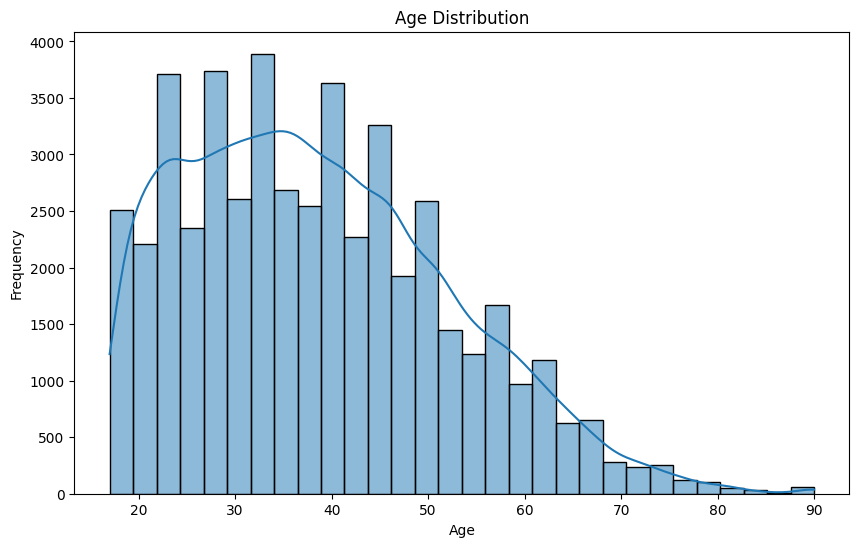

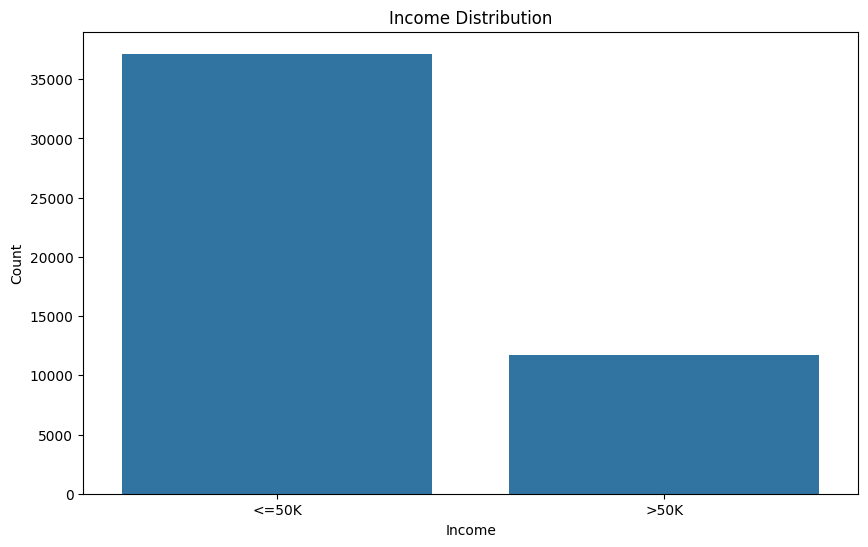

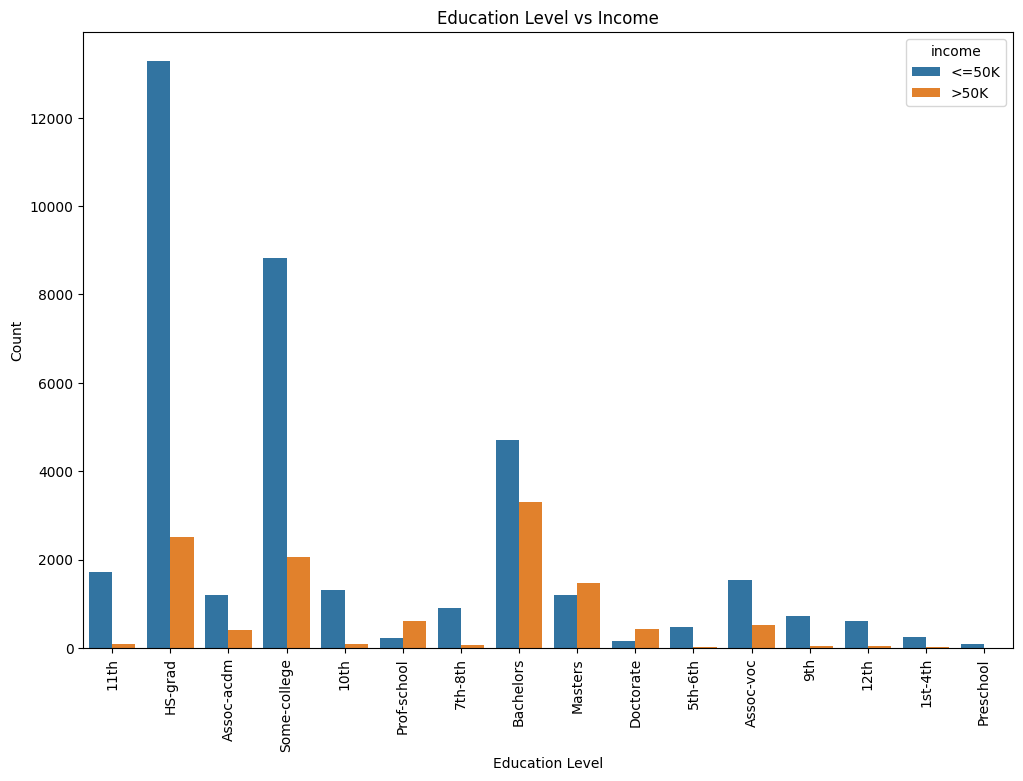

In [33]:
#Coming up with explatory visualisations
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Income distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Education level vs Income
plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='income', data=df)
plt.title('Education Level vs Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [35]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#Permutation Importance
#Choose and Train the Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Compute Permutation Importance
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[-10:]

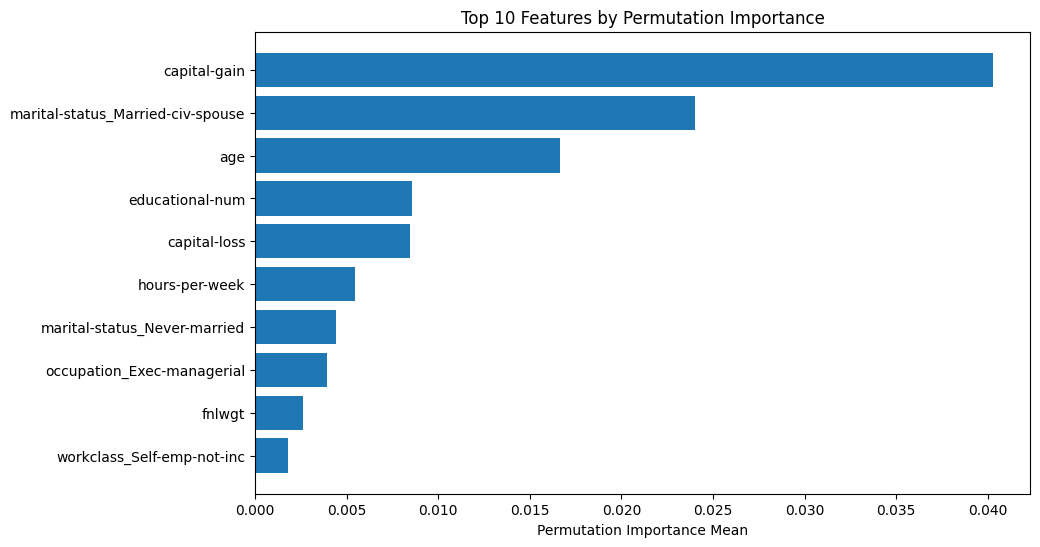

Top 10 features by permutation importance: ['workclass_Self-emp-not-inc', 'fnlwgt', 'occupation_Exec-managerial', 'marital-status_Never-married', 'hours-per-week', 'capital-loss', 'educational-num', 'age', 'marital-status_Married-civ-spouse', 'capital-gain']


In [40]:
# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Permutation Importance Mean')
plt.title('Top 10 Features by Permutation Importance')
plt.show()

# Print the top 10 features
top_features = [X.columns[i] for i in sorted_idx]
print("Top 10 features by permutation importance:", top_features)


In [41]:
#Plotting for two of the top 10 features
# Convert 'income' to binary numerical values for easier plotting
df_encoded['income'] = df_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)

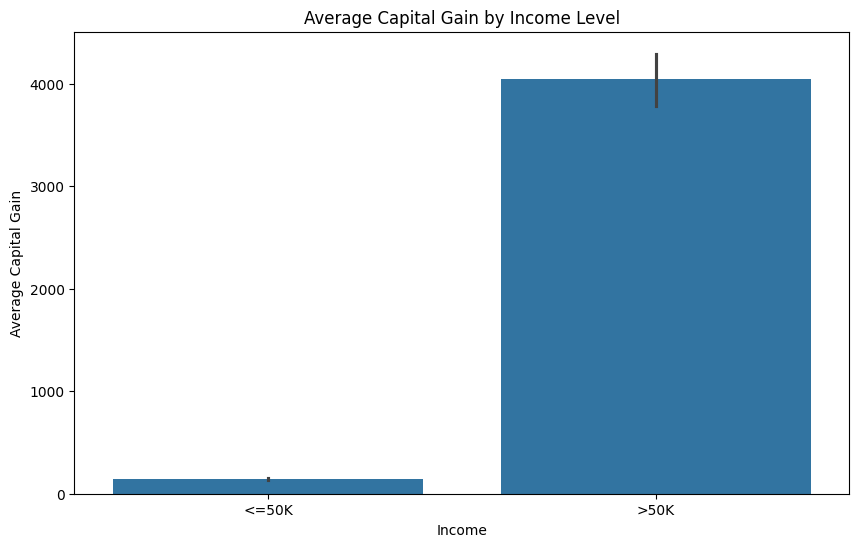

In [42]:
#  Capital-gain vs. Income
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='capital-gain', data=df_encoded)
plt.title('Average Capital Gain by Income Level')
plt.xlabel('Income')
plt.ylabel('Average Capital Gain')
plt.xticks(ticks=[0, 1], labels=['<=50K', '>50K'])
plt.show()

Individuals earning >50k have a way higher average capital gain compared to those earning <=50k.

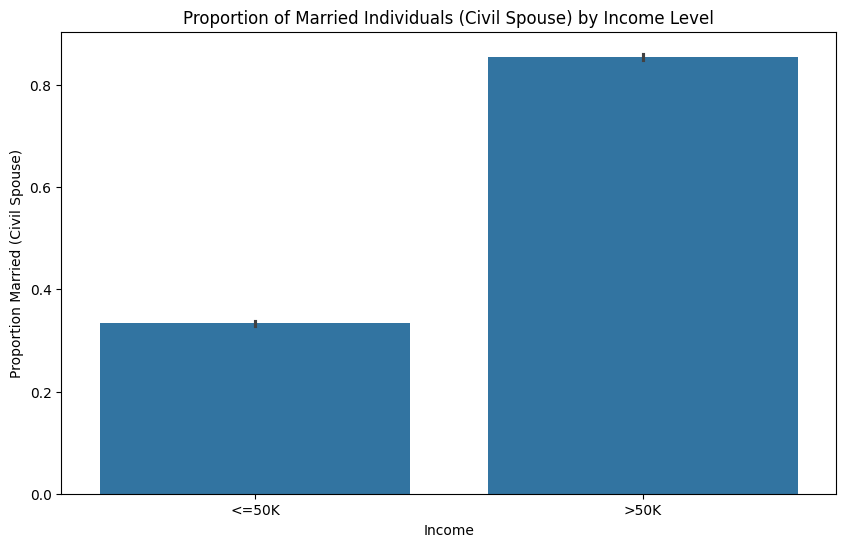

In [43]:
#Marital-status_Married-civ-spouse vs. Income
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='marital-status_Married-civ-spouse', data=df_encoded)
plt.title('Proportion of Married Individuals (Civil Spouse) by Income Level')
plt.xlabel('Income')
plt.ylabel('Proportion Married (Civil Spouse)')
plt.xticks(ticks=[0, 1], labels=['<=50K', '>50K'])
plt.show()

Being married with a civil spouse is more prevalent among individuals earning >50K, implying that marital status could be a significant factor associated with higher income.